#  NLP-lab :  Word embeddings

In this series of exercises, we will explore three word embeddings:

* [Collobert & Weston](http://www.jmlr.org/papers/volume12/collobert11a/collobert11a.pdf) https://ronan.collobert.com/senna/
* [Word2Vec](https://arxiv.org/abs/1301.3781)
* [BERT](https://huggingface.co/bert-base-uncased) 


In the code already provided, add your code to the place indicated by `YOUR CODE HERE`.

**Important** : do NOT commit the data and embedding files in your repository git : it is a waste of resources and it takes more time to clone.
> Use https://docs.github.com/en/get-started/getting-started-with-git/ignoring-files


In [16]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 2.3 MB/s eta 0:00:00a 0:00:01


In [2]:
# basic imports
import os
import matplotlib.pyplot as plt
# display matplotlib graphics in notebook
%matplotlib inline 
import seaborn as sns

# disable warnings for libraries
import warnings
warnings.filterwarnings("ignore")

# configure logger
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')
logger = logging.getLogger(__name__)


###  Embeddings exploration with Collobert's embeddings

Upload the files containing the embeddings to `data`:
* Collobert (size 50): [collobert_embeddings.txt.zip](https://storage.teklia.com/shared/deepnlp-labs/collobert_embeddings.txt.zip) which contains the embedding vectors and [collobert_words.lst](https://storage.teklia.com/shared/deepnlp-labs/collobert_words.lst) which contains the associated words;

You need to unzip the files to load them.

Feel free to open the files to see what they contain (it's sometimes surprising).

#### Question: 
>* Add the files to your .gitignore
>* Give the size in Mb of the embeddings files before unzipping.
>* By exploring the content of the embedding files, give the number of words for which these files provide embeddings.



### List of closest words

The aim of this exercise is to list the closest words to a given word for the Collobert embedding. First, we'll load the vectors of the Collobert embedding into a numpy array and the associated words into a python list. Then we'll use the [scipy KDTree](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html) data structure to quickly search for the vectors closest to a series of words.


#### Question: 
>* load embedding vectors from the file `data/collobert_embeddings.txt` using the numpy function [genfromtxt](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html)
>* load the words associated with the vectors from the `data/collobert_words.lst` file into a python list (using `open()` and `readlines()`)
>* check that the sizes are correct


In [3]:
import numpy as np
# YOUR CODE HERE


embedding_file = "collobert_embeddings.txt"
embeddings = np.genfromtxt(embedding_file, dtype=np.float32)


words_file = "collobert_words.lst"
with open(words_file, "r", encoding="utf-8") as f:
    words = [line.strip() for line in f.readlines()]

num_vectors, embedding_dim = embeddings.shape
num_words = len(words)

print(f"Number of words: {num_words}")
print(f"Number of vectors: {num_vectors}")
print(f"Embedding dimension: {embedding_dim}")


Number of words: 130000
Number of vectors: 130000
Embedding dimension: 50


KD trees are a very efficient data structure for storing large sets of points in a multi-dimensional space and performing very efficient nearest-neighbour searches. 

#### Question 
> * Initialise the [KDTree](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html) structure with Collobert's embedding vectors.
> * Using the [tree.query](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.query.html#scipy.spatial.KDTree.query) function, display the 5 nearest words for the following words: ‘mother’, ‘computer’, ‘dentist’, ‘war’, ‘president’, ‘secretary’, ‘nurse’.  *Hint: you can use the function `collobert_words.index(w)` to obtain the index of a word in the list of words*.
> * Create a `words_plus_neighbors` list containing the words and all their neighbours (for the next question)

In [4]:
from scipy import spatial
# YOUR CODE HERE


# Initialize KDTree with the embeddings
tree = spatial.KDTree(embeddings)


target_words = ['mother', 'computer', 'dentist', 'war', 'president', 'secretary', 'nurse']

# Find the 5 nearest neighbors for each word
words_plus_neighbors = {}

for word in target_words:
    try:
        word_index = words.index(word)  
        distances, indices = tree.query(embeddings[word_index], k=6)  #
        
        # Get the corresponding words
        nearest_words = [words[i] for i in indices]
        
        # Store in the dictionary
        words_plus_neighbors[word] = nearest_words

        print(f"Closest words to '{word}': {nearest_words[1:]}")  # Exclude the word itself
    except ValueError:
        print(f"'{word}' not found in vocabulary!")


words_plus_neighbors_list = [(word, neighbors[1:]) for word, neighbors in words_plus_neighbors.items()]

 

Closest words to 'mother': ['daughter', 'wife', 'father', 'husband', 'son']
Closest words to 'computer': ['laptop', 'multimedia', 'desktop', 'software', 'wiki']
Closest words to 'dentist': ['pharmacist', 'midwife', 'physician', 'housekeeper', 'veterinarian']
Closest words to 'war': ['revolution', 'death', 'court', 'independence', 'history']
Closest words to 'president': ['governor', 'chairman', 'mayor', 'secretary', 'senator']
Closest words to 'secretary': ['minister', 'treasurer', 'chairman', 'commissioner', 'undersecretary']
Closest words to 'nurse': ['physician', 'veterinarian', 'dentist', 'surgeon', 'midwife']


### Visualisation with T-SNE

Embeddings are vectors with several hundred dimensions. It is therefore not possible to display them in their original space. However, it is possible to apply dimension reduction algorithms to display them in 2 or 3 dimensions. One of the dimension reduction algorithms allowing 2D visualisation is [tSNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding). 

#### Question
> * Create a `word_vectors` object of type `np.array` from a list containing all the embeddings of the words in the `words_plus_neighbors` list.
> * Create a tSNE object from the `from sklearn.manifold import TSNE` library with the parameters `random_state=0`, `n_iter=2000` and `perplexity=15.0` for a 2-dimensional view.
> * Calculate *T* the tSNE transformation of the `word_vectors` by applying function `.fit_transform(word_vectors)` to the tSNE object. This function estimates the parameters of the tSNE transformation and returns the reduced-dimension representation of the vectors used for estimation.
> * Use the `scatterplot` function from [seaborn](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) to represent points in 2 dimensions and add word labels using the `plt.annotate` function.

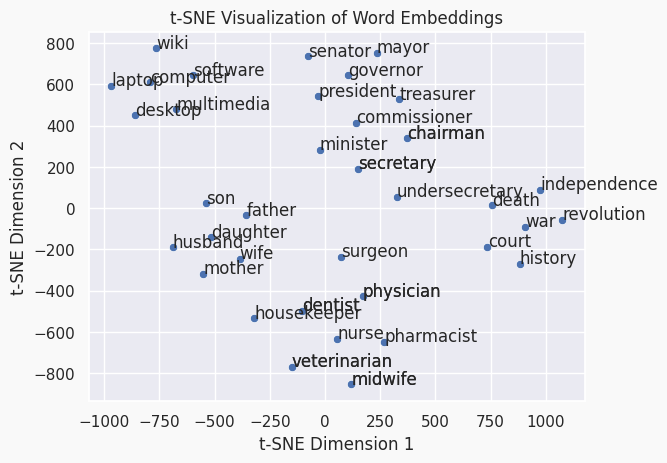

In [5]:
from sklearn.manifold import TSNE
# graphics
import matplotlib.pyplot as plt
# display matplotlib graphics in notebook
%matplotlib inline 
import seaborn as sns

# retrieve the word representation

word_vectors = []
word_labels = []

for main_word, neighbors in words_plus_neighbors_list:
    all_words = [main_word] + neighbors  

    for word in all_words:
        if word in words:  
            word_vectors.append(embeddings[words.index(word)])
            word_labels.append(word)
        else:
            print(f"Warning: '{word}' not found in the vocabulary!")  

word_vectors = np.array(word_vectors)

# create the tSNE transform


tsne = TSNE(n_components=2, random_state=0, n_iter=2000, perplexity=15.0)


# fit and transform the word vectors, store in T

T = tsne.fit_transform(word_vectors)

# plot
fig = plt.figure()
fig.patch.set_facecolor('#f9f9f9')

sns.set(rc={'figure.figsize':(14, 8)})
sns.set(font_scale=1)

sns.scatterplot(x=T[:, 0], y=T[:, 1])

for label, x, y in zip(word_labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')


plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()



### Semantic arithmetic with Word2Vec

One of the most original properties of Word2Vec embeddings is that the semantic relationships between vectors can be modelled by arithmetic operations. Given vectors representing the words `king`, `man` and `woman`, it is possible to compute the vector `v` as :  

`v = vector(king)-vector(man)+vector(woman)`

This operation corresponds to the following semantic relationship: *The king is to the man what the queen is to the woman*, which translates into the following arithmetic: *the concept of king, minus the concept of man plus the concept of woman gives the concept of queen*.

In fact, if we look in the embedding for the word whose closest vector is `v`, we find `reine`.


We will use a Word2Vec model pre-trained on the French Wac corpus.  This model has been trained on a corpus of 1 billion French words. 

This embedding is available in 2 formats:
- a text format for easy exploration of the model :
    - frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.txt](https://storage.teklia.com/shared/deepnlp-labs/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.txt)
- a binary format that can be loaded using the Gensim library: 
    - [enWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin](https://storage.teklia.com/shared/deepnlp-labs/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin)

Download the text file onto your machine to analyse it.

#### Question: 
>* Add the file to your .gitignore
>* Give the size in Mb of the embedding files
>* By exploring the contents of the embedding file in text format, give the number of words for which this model provides embeddings and the size of the embedding for each word.



YOUR ANSWER HERE

#### Word similarity

We are now going to use the [Gensim] library (https://radimrehurek.com/gensim/) to load the Word2Vec model and use it. 

#### Question: 
>* Modify the following code to load the Word2Vec template file in binary format using [load_word2vec](https://radimrehurek.com/gensim/models/keyedvectors.html#how-to-obtain-word-vectors)
>* Choose a couple of words and find the closest words according to the model using [most_similar](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar)
>* To guess the meaning of the words ‘yokohama’, ‘kanto’ and ‘shamisen’, look for their nearest neighbours. Explain the results.


In [25]:
#pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 39.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 38.6 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 41.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.3
    Uninstalling numpy-2.2.3:
      Successfully uninstalled numpy-2.2.3
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
Note: you may need to restart the kernel to use updated packages.


In [8]:
from gensim.models import KeyedVectors

## YOUR CODE HERE
embedding_file ="frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin"
model = KeyedVectors.load_word2vec_format(embedding_file, binary=True, unicode_errors="ignore")
## YOUR CODE HERE
model.most_similar("chevalier")

try:
    print("Closest words to 'yokohama':", model.most_similar("yokohama", topn=5))
except KeyError:
    print("'yokohama' not found in the vocabulary.")

# Yokohama is close to Toyko, Japan and Nagoya, so it's likely a city in Japan

try:
    print("Closest words to 'kanto':", model.most_similar("kanto", topn=5))
except KeyError:
    print("'kanto' not found in the vocabulary.")

#Kanto is close to pokemon, mewtwo and saito, so it's likely a region in pokemon


try:
    print("Closest words to 'shamisen':", model.most_similar("shamisen", topn=5))
except KeyError:
    print("'shamisen' not found in the vocabulary.")

# Shamisen is not in the vocabulary

01:16:29 INFO:loading projection weights from frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin
01:16:29 INFO:KeyedVectors lifecycle event {'msg': 'loaded (155562, 200) matrix of type float32 from frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2025-03-07T13:16:29.948495', 'gensim': '4.3.3', 'python': '3.12.7 | packaged by conda-forge | (main, Oct  4 2024, 16:05:46) [GCC 13.3.0]', 'platform': 'Linux-6.1.0-30-amd64-x86_64-with-glibc2.35', 'event': 'load_word2vec_format'}


Closest words to 'yokohama': [('tokyo', 0.7117858529090881), ('tôkyô', 0.6314416527748108), ('japon', 0.621522068977356), ('nagoya', 0.6198478937149048), ('kyushu', 0.6141085028648376)]
Closest words to 'kanto': [('pokémon', 0.5426285266876221), ('mewtwo', 0.5076008439064026), ('pokémons', 0.4970632791519165), ('saito', 0.4549728333950043), ('pokédex', 0.448673278093338)]
'shamisen' not found in the vocabulary.


#### Semantic arithmetic

One of the most original properties of Word2Vec embeddings is that the semantic relationships between vectors can be modelled by arithmetic operations. Given vectors representing the words `king`, `man` and `woman`, it is possible to compute the vector `v` as :  

`v = vector(king)-vector(man)+vector(woman)`

This operation corresponds to the following semantic relationship: *The king is to the man what the queen is to the woman*, which translates into the following arithmetic: *the concept of king, minus the concept of man plus the concept of woman gives the concept of queen*.

In fact, if we look in the embedding for the word whose closest vector is `v`, we find `reine`.

#### Question: 
>* using the function [most_similar](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar) specifying the arguments `positive` for the vectors to be added and `negative` for the vectors to be subtracted, check the relationship *the concept of king, minus the concept of man plus the concept of woman gives the concept of queen*.
>* Using the same method, find XXX in the following semantic relations
>   * Paris is to France what XXX is to Japan.
>   * Chevalier is to France what XXX is to Japan.

In [14]:
## YOUR CODE HERE

# King - Man + Woman = Queen 
result = model.most_similar(positive=["roi", "femme"], negative=["homme"], topn=5)
print("King - Man + Woman:", result)


# Paris is to France what XXX is to Japan
result = model.most_similar(positive=["paris", "japon"], negative=["france"], topn=5)
print("Paris - France + Japan:", result)


# Chevalier is to France what XXX is to Japan
result = model.most_similar(positive=["chevalier", "japon"], negative=["france"], topn=5)
print("Chevalier - France + Japan:", result)


King - Man + Woman: [('reine', 0.6945513486862183), ('duchesse', 0.6247551441192627), ('épouse', 0.6083102822303772), ('régente', 0.5878491997718811), ('duc', 0.5723880529403687)]
Paris - France + Japan: [('tokyo', 0.6542136073112488), ('tôkyô', 0.6187594532966614), ('osaka', 0.541408121585846), ('japonaise', 0.537601888179779), ('nagoya', 0.5211064219474792)]
Chevalier - France + Japan: [('samouraï', 0.5616667866706848), ('samouraïs', 0.5008909106254578), ('edo', 0.4938366711139679), ('japonaise', 0.48597386479377747), ('chevaliers', 0.482717901468277)]


## Contextual embeddings with BERT 

BERT was one of the first freely available Transformer language models, trained on large corpora. Many other models are available on HuggingFace.

As BERT is a contextual model, it is necessary to have it predict whole sentences in order to study the word embeddings it produces. In this section, we will compare the embeddings obtained for polysemous words according to the sentence in which they are used.

In English, *plant* has two meanings: plant and vegetable. With a non-contextual embedding, such as Glove or Colobert, these two meanings of the word plus are associated with an identical embedding. With BERT, we'll see that the same word can have several embeddings depending on the context.

First, load the BERT model and tokenizer from HuggingFace : 

In [16]:
#pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 84.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
import torch
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Load pre-trained model 
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # to access the hidden states
                                  )
# set the model to "evaluation" mode
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

### Tokenizer

Language models are trained with a specific breakdown of sentences into tokens. These tokens can be words or parts of words. It is necessary to use the tokenizer corresponding to each model.

tokenizer.vocab.keys() gives the list of all the tokens known for the language model. 

#### Question
>* How many different tokens are known to the BERT tokenizer?
>* Display a hundred tokens at random. What do you find?

In [18]:
import random
# number of token in tokenizer
# YOU CODE HERE

num_tokens = len(tokenizer.vocab)
print(f"Total tokens in the BERT tokenizer: {num_tokens}")


# sample of 100 tokens
# YOU CODE HERE


# Sample 100 tokens randomly
sample_tokens = random.sample(list(tokenizer.vocab.keys()), 100)


print("Random 100 tokens from BERT vocabulary:", sample_tokens)



Total tokens in the BERT tokenizer: 30522
Random 100 tokens from BERT vocabulary: ['fishermen', 'connecticut', '##oted', '1950', 'arya', 'development', 'influences', 'smashwords', 'lisa', 'watson', 'sealing', 'downstairs', 'intensive', '##ists', 'imposed', 'cap', '##vita', 'ab', 'ر', 'machine', 'dots', '##ᴬ', 'frown', 'otherwise', '##all', 'leger', 'contestant', 'prospective', 'nervously', 'advocates', 'experiment', 'zip', 'aeronautics', 'cher', 'snarled', 'penned', '##ln', 'npr', 'peterborough', 'mentioning', 'shrugged', '##bs', 'romeo', 'candles', '##vyn', 'jenks', 'fantasies', '[unused824]', 'disgust', 'ambulance', 'natalie', '1642', '[unused448]', '1902', 'provoke', 'disappear', 'abdomen', '##rangle', '##ram', 'koreans', 'sammy', 'genius', 'charleston', 'involvement', '[unused559]', 'referees', 'middleton', 'brilliant', '##nio', 'circumstance', 'intelligence', '##ammed', 'canal', 'versions', 'california', 'faltered', 'bison', 'monarchy', 'coats', 'last', 'disruption', 'cv', 'saxoph

The tokenizer splits sentences and transforms the elements (words or sub-words) into clues. 

BERT can process several sentences, but you need to tell it how the sentences (segments) have been split, with an index: 0 for the first sentence, 1 for the second. 

Two specific tokens must also be added: 
* CLS], a specific token used for sentence classification
* SEP], the end of sentence token.

#### Question
>* Apply the bert_tokenize function to the 3 phases and keep the 3 vectors (index, token, segment).
>* Display this information for each of the sentences and check that the word *plant* has the same token index in the two sentences in which it appears.

In [19]:
snt1 = "The plant has reached its maximal level of production."
snt2 = "The cars are assembled inside the factory."
snt3 = "A plant needs sunlight and water to grow well."


def bert_tokenize(snt):
    """
    Apply the BERT tokenizer to a sentence and return:
    - List of token indices
    - List of tokens (for debugging)
    - List of segment indices
    """
    # Add special tokens and tokenize
    tokenized_snt = tokenizer.tokenize(snt)
    tokenized_snt = ["[CLS]"] + tokenized_snt + ["[SEP]"]

    # Convert tokens to indices
    indexed_snt = tokenizer.convert_tokens_to_ids(tokenized_snt)

    # Create segment IDs (all 1s since it's a single sentence)
    segments_ids = [1] * len(indexed_snt)

    return indexed_snt, tokenized_snt, segments_ids


# YOUR CODE HERE


# Tokenize sentences
indexed_snt1, tokenized_snt1, segments_ids1 = bert_tokenize(snt1)
indexed_snt2, tokenized_snt2, segments_ids2 = bert_tokenize(snt2)
indexed_snt3, tokenized_snt3, segments_ids3 = bert_tokenize(snt3)

# Print tokenized results
print("Sentence 1 Tokens:", tokenized_snt1)
print("Sentence 1 Token IDs:", indexed_snt1)
print("\nSentence 2 Tokens:", tokenized_snt2)
print("Sentence 2 Token IDs:", indexed_snt2)
print("\nSentence 3 Tokens:", tokenized_snt3)
print("Sentence 3 Token IDs:", indexed_snt3)



Sentence 1 Tokens: ['[CLS]', 'the', 'plant', 'has', 'reached', 'its', 'maximal', 'level', 'of', 'production', '.', '[SEP]']
Sentence 1 Token IDs: [101, 1996, 3269, 2038, 2584, 2049, 29160, 2504, 1997, 2537, 1012, 102]

Sentence 2 Tokens: ['[CLS]', 'the', 'cars', 'are', 'assembled', 'inside', 'the', 'factory', '.', '[SEP]']
Sentence 2 Token IDs: [101, 1996, 3765, 2024, 9240, 2503, 1996, 4713, 1012, 102]

Sentence 3 Tokens: ['[CLS]', 'a', 'plant', 'needs', 'sunlight', 'and', 'water', 'to', 'grow', 'well', '.', '[SEP]']
Sentence 3 Token IDs: [101, 1037, 3269, 3791, 9325, 1998, 2300, 2000, 4982, 2092, 1012, 102]


## Inference

To calculate embeddings, we need to make a prediction using the BERT model on a complete sentence. The *predict_hidden* function converts the token and segment index lists into a pytorch tensor and applies the model. 

The model used is a 12-layer model. We will use the last hidden layer of the model as an embedding to represent the words. Other solutions are possible, such as concatenation or averaging of several layers.


#### Question
>* Apply the model to each of the 3 sentences and store the resulting embeddings (tensors).
>* Display the dimension of the resulting tensors. What is the dimension of the embedding vector for each word?

In [20]:

def predict_hidden(indexed_snt, segments_ids):
    """Apply the BERT model to the input token indices and segment indices
        and return the last hidden layer
    """
    with torch.no_grad():
        # Convert inputs to PyTorch tensors
        tokens_tensor = torch.tensor([indexed_snt])
        segments_tensors = torch.tensor([segments_ids])
        outputs = model(tokens_tensor, segments_tensors)
        hidden_states = outputs.hidden_states
        last_hidden_layer = hidden_states[-1]
        
    return last_hidden_layer

# YOUR CODE HERE

# Tokenize and get indexed sentences
snt1_indexed, snt1_tokens, snt1_segments = bert_tokenize(snt1)
snt2_indexed, snt2_tokens, snt2_segments = bert_tokenize(snt2)
snt3_indexed, snt3_tokens, snt3_segments = bert_tokenize(snt3)

# Get embeddings for each sentence
embedding_snt1 = predict_hidden(snt1_indexed, snt1_segments)
embedding_snt2 = predict_hidden(snt2_indexed, snt2_segments)
embedding_snt3 = predict_hidden(snt3_indexed, snt3_segments)

# Display tensor shapes
print("Shape of Sentence 1 Embedding:", embedding_snt1.shape)
print("Shape of Sentence 2 Embedding:", embedding_snt2.shape)
print("Shape of Sentence 3 Embedding:", embedding_snt3.shape)

# Every token in the sentence is represented by a 768-dimensional embedding.

Shape of Sentence 1 Embedding: torch.Size([1, 12, 768])
Shape of Sentence 2 Embedding: torch.Size([1, 10, 768])
Shape of Sentence 3 Embedding: torch.Size([1, 12, 768])


The hidden layer returned by the *predict_hidden* function is a tensor containing a context vector representing each token in the input sentence. We can use this vector to represent the meaning of this word as a function of its context. We're going to compare the representation of the polysemous word *plant* as a function of its context.

#### Question
>* Using the [cosine distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html), calculate the following distances:
> * distance between *plant* in sentence 1 (plant-factory) and *plant* in sentence 3 (plant-vegetal)
> * distance between *plant* in sentence 1 (plant-factory) and *factory* in sentence 2 (plant-vegetal) 
> * distance between *plant* in sentence 1 (plant-factory) and *production* in sentence 2 
> distance between *plant* in sentence 3 (plant-vegetal) and *production* in sentence 2 
> How can we interpret these distances?

In [23]:
from scipy.spatial.distance import cosine

# YOUR CODE HERE


# Get the token index of "plant" in each sentence
plant_idx_snt1 = tokenized_snt1.index("plant")
plant_idx_snt2 = tokenized_snt2.index("factory")  # "factory" for comparison
plant_idx_snt3 = tokenized_snt3.index("plant")

# Extract embeddings for "plant" from the last hidden layer
plant_embedding_snt1 = embedding_snt1[0, plant_idx_snt1, :].numpy()  # Convert to NumPy
plant_embedding_snt2 = embedding_snt2[0, plant_idx_snt2, :].numpy()
plant_embedding_snt3 = embedding_snt3[0, plant_idx_snt3, :].numpy()


# Distance between "plant" (factory meaning) in snt1 and "plant" (vegetal meaning) in snt3
dist_plant_snt1_snt3 = cosine(plant_embedding_snt1, plant_embedding_snt3)

# Distance between "plant" (factory meaning) in snt1 and "factory" in snt2
dist_plant_snt1_factory_snt2 = cosine(plant_embedding_snt1, plant_embedding_snt2)

# Distance between "plant" (vegetal meaning) in snt3 and "production" in snt2
production_idx_snt2 = tokenized_snt1.index("production")  # Find "production"
production_embedding_snt2 = embedding_snt2[0, production_idx_snt2, :].numpy()
dist_plant_snt3_production_snt2 = cosine(plant_embedding_snt3, production_embedding_snt2)

# Print results
print(f"Cosine distance between 'plant' (factory) in Snt1 and 'plant' (vegetal) in Snt3: {dist_plant_snt1_snt3:.4f}")
print(f"Cosine distance between 'plant' (factory) in Snt1 and 'factory' in Snt2: {dist_plant_snt1_factory_snt2:.4f}")
print(f"Cosine distance between 'plant' (vegetal) in Snt3 and 'production' in Snt1: {dist_plant_snt3_production_snt2:.4f}")



Cosine distance between 'plant' (factory) in Snt1 and 'plant' (vegetal) in Snt3: 0.4987
Cosine distance between 'plant' (factory) in Snt1 and 'factory' in Snt2: 0.3123
Cosine distance between 'plant' (vegetal) in Snt3 and 'production' in Snt2: 0.8250
